# Sprint Week Dec3-8 (Central region of DC2 Catalog)

In [1]:
# add required paths
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py3-envs/DESCQA/lib/python3.6/site-packages')
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [2]:
# import required modules
import GCRCatalogs

In [10]:
# import common modules
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [7]:
## load 'protoDC2' catalog
gc = GCRCatalogs.load_catalog('protoDC2')
# print(', '.join(gc.list_all_quantities()))

# Parameters for central part

In [18]:
# quanties to read
columns = [ 'halo_mass','ra','dec','is_central','redshift_true', 
                          'convergence','ellipticity_1','ellipticity_2']
# data
data = gc.get_quantities(columns)
df = pd.DataFrame(data,columns=columns)

# Galaxies in central region halo
box_size = 0.33
df = df.loc[(df['ra']>-box_size)&(df['ra']<box_size)&(df['dec']>-box_size)&(df['dec']<box_size)]
df.to_csv('midregion_params.csv')
df.describe()


,halo_mass,ra,dec,redshift_true,convergence,ellipticity_1,ellipticity_2
count,1.728720e+05,172872.000000,172872.000000,172872.000000,172872.000000,1.728720e+05,1.728720e+05
mean,1.130638e+13,-0.013038,0.010474,0.697847,0.041233,1.308227e-02,1.308227e-02
std,2.561189e+13,0.187693,0.188981,0.232826,0.023561,1.410040e-02,1.410040e-02
min,1.635721e+10,-0.329989,-0.329981,0.036233,0.000021,1.062179e-08,1.062179e-08
25%,7.851460e+10,-0.170263,-0.145570,0.568601,0.024675,3.061387e-03,3.061387e-03
50%,7.397344e+11,-0.024869,0.010174,0.730374,0.040678,8.058015e-03,8.058015e-03
75%,7.878543e+12,0.143683,0.182292,0.894545,0.055953,1.808279e-02,1.808279e-02
max,1.459334e+14,0.330000,0.329999,0.998012,0.203877,8.914589e-02,8.914589e-02


# Plot convergence map of the central region

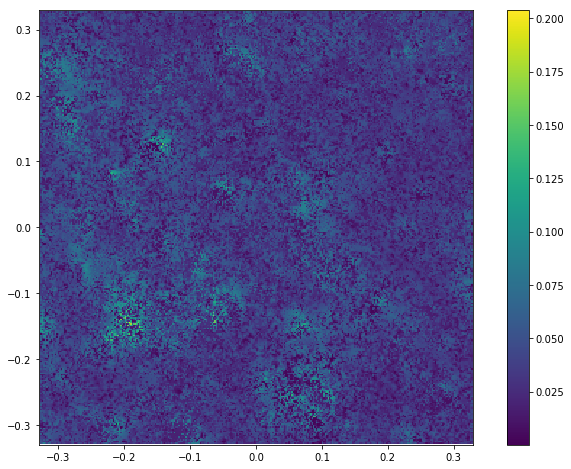

In [17]:
import scipy.interpolate
plt.rcParams["figure.figsize"] = [12,8]

# data
x, y, rho = df['ra'], df['dec'], df['convergence']

# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 300), np.linspace(y.min(), y.max(), 300)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = scipy.interpolate.griddata((x, y), rho, (xi, yi), method='linear')

# plot
plt.imshow(zi, vmin=rho.min(), vmax=rho.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],aspect='equal')
plt.colorbar()
plt.show()